# Description:
This notebook is used to plot the electron drift speed in liquid argon (LAr) as a function of the LAr temperature.

The sources can be found here:

https://inspirehep.net/literature/1194838

https://lbne2-docdb.fnal.gov/cgi-bin/RetrieveFile?docid=4482&filename=Properties%20of%20LAr%20v9a.pdf&version=1

### Imports

In [104]:
from matplotlib import pyplot as plt
import numpy as np
from scipy.optimize import curve_fit
import seaborn

### Define fit function

In [151]:
def fit_function(E, T):
    
    if E<0.8:
        # Parameters from FNAL document:
        p1 = -0.0462553
        p2 =  0.0148508
        p3 =  1.64156
        p4 =  1.273
        p5 =  0.0086608
        p6 =  4.71489
        T0 =  104.326
        
        v_drift = (p1*(T-T0) + 1.) * (p3*E*np.log(1.+p4/E) + p5*np.power(E,p6)) + p2*(T-T0) - 0.1382074651689208/2. # Last term: To make transition smooth
    
    else:
        # Parameters from Kalinin:
        p1 = -0.016863
        p2 = -0.0083412
        p3 =  0.18088
        p4 =  8.9751
        p5 =  1.4614
        p6 =  0.32891
        T0 = 92.91
        
        '''
        if T == 87.3:
            v_drift = (p1*(T-T0) + 1.) * (p3*E*np.log(1.+p4/E) + p5*np.power(E,p6)) + p2*(T-T0) + 0.09921185917412179/2. # Last term: To make transition smooth
        elif T == 89.3:
            v_drift = (p1*(T-T0) + 1.) * (p3*E*np.log(1.+p4/E) + p5*np.power(E,p6)) + p2*(T-T0) + 0.07746147089128591/2.
        elif T == 91.3:
            v_drift = (p1*(T-T0) + 1.) * (p3*E*np.log(1.+p4/E) + p5*np.power(E,p6)) + p2*(T-T0) + 0.05571108260845001/2.
        else:
            v_drift = (p1*(T-T0) + 1.) * (p3*E*np.log(1.+p4/E) + p5*np.power(E,p6)) + p2*(T-T0)
        '''
        v_drift = (p1*(T-T0) + 1.) * (p3*E*np.log(1.+p4/E) + p5*np.power(E,p6)) + p2*(T-T0)
    
    return v_drift

### Make plot

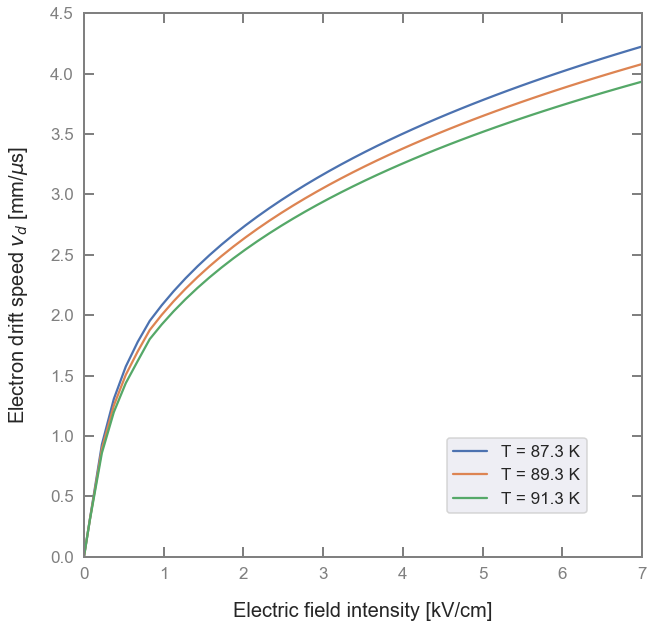

In [154]:
seaborn.set(rc={'figure.figsize':(15, 10),})
seaborn.set(rc={'figure.figsize':(10, 10),})
seaborn.set_context('talk') # or paper

# Produce fitted points
T_values = [87.3, 89.3, 91.3]
x_values = []
y_values = []

n_points = 50
E_min, E_max = 0.0, 7.5

for T_index, T in enumerate(T_values):
    _x_values = []
    _y_values = []
    _x_values.append(0.0)
    _y_values.append(0.0)
    for i in range(1,n_points+1):
        E = (E_max-E_min)/n_points * (i-1) + (E_max-E_min)/n_points/2.
        #print(' E: ', E)
        _x_values.append(E)
        _y_values.append(fit_function(E,T))
    x_values.append(_x_values)
    y_values.append(_y_values)
#print(' x: ', x_values)
#print(' y: ', y_values)

# Define parameters of the frame
fig = plt.figure() # plt.figure(figsize=(width,height))
ax = fig.add_subplot(111)
ax.patch.set_alpha(0.0)
ax.spines['bottom'].set_color('0.5') #'black', ...
ax.spines['bottom'].set_linewidth(2)
ax.spines['bottom'].set_visible(True)
ax.spines['top'].set_color('0.5')
ax.spines['top'].set_linewidth(2)
ax.spines['top'].set_visible(True)
ax.spines['right'].set_color('0.5')
ax.spines['right'].set_linewidth(2)
ax.spines['right'].set_visible(True)
ax.spines['left'].set_color('0.5')
ax.spines['left'].set_linewidth(2)
ax.spines['left'].set_visible(True)

# Ticks, grid and ticks labels
ax.tick_params(direction='in', length=10, width=2,                 # direction, length and width of the ticks (in, out, inout)
               colors='0.5',                                       # color of the ticks ('black', '0.5')
               bottom=True, top=True, right=True, left=True,       # whether to draw the respective ticks
               zorder = 10.,                                       # tick and label zorder
               pad = 10.,                                          # distance between ticks and tick labels
               labelsize = 17,                                     # size of the tick labels
               labelright=False, labeltop=False)                   # wether to draw the tick labels on axes

# Axis limits
ax.set_xlim((E_min,7.))
#ax.set_xlim((0.,4.))
ax.set_ylim((0.,4.5))

#plt.errorbar(x_vals,y_vals,xerr=x_err,yerr=y_err,fmt='o',label='Data') # fmt='-o'
#plt.plot(fit_boxModel_x,fit_boxModel_y,'r-',label=r'Box Model Fit: $Q_0 = %3.1f \pm %3.1f , \beta = %3.3f \pm %3.3f$' %(Q0_boxModel,Q0_boxModel_err,beta_boxModel,beta_boxModel_err))
#plt.plot(fit_birksModel_x,fit_birksModel_y,'g-',label=r'Birks Model Fit: $Q_0 = %3.1f \pm %3.1f , k_E = %3.3f \pm %3.3f$' %(Q0_birksModel,Q0_birksModel_err,k_birksModel,k_birksModel_err))

for T_index, T in enumerate(T_values):
    plt.plot(x_values[T_index], y_values[T_index], '-', label=r'T = %3.1f K' %(T))

# Legend
plt.legend(loc=[0.65,0.08], prop={'size': 17})
#plt.legend(loc=[0.75,0.85], prop={'size': 17}) # loc='upper right', 'best'

# Axis labels
axis_labels = ['Electric field intensity [kV/cm]', 'Electron drift speed $v_{d}$ [mm/$\mu$s]']
plt.xlabel(axis_labels[0], fontsize=20, labelpad=20)
plt.ylabel(axis_labels[1], fontsize=20, labelpad=20)

# Logarithmic y axis
#plt.ylim(bottom=0.9) #, top=200)
#plt.yscale('linear') # linear, log

# Save figure
save_name = 'electron_driftVelocity_vs_Efield.png'
plt.savefig(save_name, dpi=400) # bbox_inches='tight'
#plt.close()
#plt.show()